<a href="https://colab.research.google.com/github/wllgrnt/keras-examples/blob/master/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3

Example models for:
- two-class classification
- many-class classification
- regression

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Using TensorFlow backend.


## Binary classification

In [0]:

# Load the IMDB dataset
# I have to overwrite np.load as keras hasn't kept pace with the latest version of numpy
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

np.load = old
del(old)


In [3]:
train_data.shape

(25000,)

In [21]:
def decode_imdb_review(coded_review):
  """
  A coded review is a list of word indices - this converts it back into a list of words
  """
  word_index  = keras.datasets.imdb.get_word_index()
  reverse_word_index = {value: key for key, value in word_index.items()}
  # -3 as 0,1,2 are reserved for padding, start of sequence, and unknown
  decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in coded_review])
  n = 100  # put newlines in for ease of reading
  return "\n".join([decoded_review[i:i + n] for i in range(0, len(decoded_review), n)])

print(decode_imdb_review(train_data[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the
 part they played and you could just imagine being there robert ? is an amazing actor and now the sa
me being director ? father came from the same scottish island as myself so i loved the fact there wa
s a real connection with this film the witty remarks throughout the film were great it was just bril
liant so much that i bought the film as soon as it was released for ? and would recommend it to ever
yone to watch and the fly fishing was amazing really cried at the end it was so sad and you know wha
t they say if you cry at a film it must have been good and this definitely was also ? to the two lit
tle boy's that played the ? of norman and paul they were just brilliant children are often left out 
of the ? list i think because the stars that play them all grown up are such a big profile for the w
hole film but these children are amazing and should be praised for what they have done don'

In [0]:
# We can't feed variable-length lists of integers into our network (apparently),
# so one-hot encode each integer as a vector of 0s with a 1 at the index of the integer  

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

W0614 10:08:43.353623 140625381713792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 10:08:43.396964 140625381713792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 10:08:43.404325 140625381713792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
# We could also pass in our own optimizers e.g. form keras.optimisers, ditto for metrics
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

W0614 10:08:43.459581 140625381713792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 10:08:43.497683 140625381713792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0614 10:08:43.504798 140625381713792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [10]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

W0614 10:08:43.786457 140625381713792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.5048 - acc: 0.7871 - val_loss: 0.3775 - val_acc: 0.8703
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.2992 - acc: 0.9046 - val_loss: 0.3001 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.2173 - acc: 0.9283 - val_loss: 0.3081 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1747 - acc: 0.9440 - val_loss: 0.2827 - val_acc: 0.8841
Epoch 5/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1422 - acc: 0.9540 - val_loss: 0.2855 - val_acc: 0.8859
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1147 - acc: 0.9651 - val_loss: 0.3140 - val_acc: 0.8777
Epoch 7/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.0977 - acc: 0.9709 - val_loss: 0.3131 - 

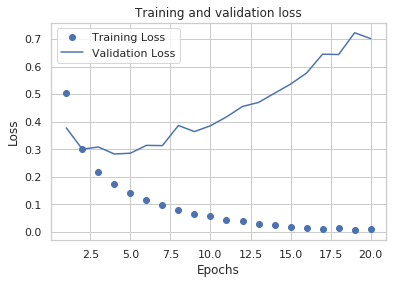

In [11]:
# Looks overfit beyond belief to me! We have a History object that can tell us more 

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

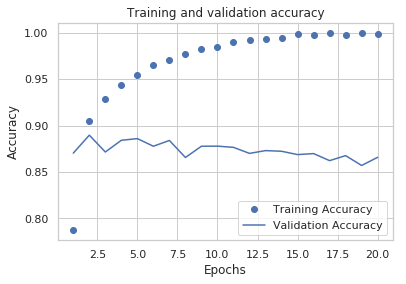

In [12]:
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
# We can generate the likelihood of reviews being positive using the `predict` method:

model.predict(X_test)

array([[0.00745511],
       [0.9999998 ],
       [0.72231364],
       ...,
       [0.00259408],
       [0.01707467],
       [0.68854976]], dtype=float32)


## Multi-class classificiation

Classifying Reuters newswires into 46 mutually exclusive categories


In [0]:
# Again, have to overwrite np.load to take account of new defaults
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=10000)

np.load = old
del(old)


In [23]:
print(len(train_data), len(test_data))

8982 2246


In [0]:
# Vectorize the data as before - one-hot encode the labels

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

# This is identical to the "to_categorical" function in keras.utils.np_utils
def to_one_hot(labels, dimension=46):
  """
  There are 46 classes by default.
  """
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(46, activation="softmax"))

In [0]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
# Validation set
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [29]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 199us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 166us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 168us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 165us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


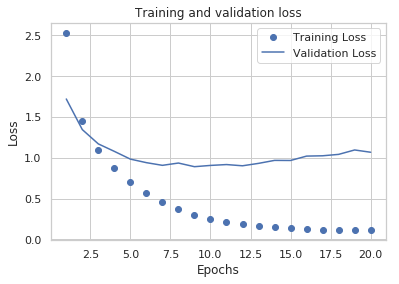

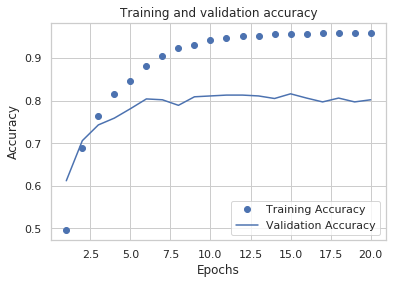

In [30]:

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
results = model.evaluate(X_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 92us/step
[1.2108647984685583, 0.778717720444884]


The accuracy is about 80%, which seems pretty good given the number of classes!

In [33]:
# Random baseline

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
matchs = np.array(test_labels) == np.array(test_labels_copy)
print(np.sum(matchs)/len(matchs))

0.1834372217275156


In [35]:
# The results of a prediction is a probability for each of the 46 classes
predictions = model.predict(X_test)

print(predictions[0].shape)

print(np.sum(predictions[0]))

(46,)
0.99999994


NB: We could encode the labels as an integer tensor
```
y_train = np.asarray(train_labels)
y_yest = np.asarray(test_labels)
```

Then, rather than using `categorical_crossentropy`  we would use `sparse_categorical_crossentropy` as the loss function

In [36]:
# Let's see what happens if we randomly introduce a bottleneck in our intermediate layers by 
# projecting to a 4d subspace (the final outputs are 46-dimensional)

model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(keras.layers.Dense(4, activation="relu"))
model.add(keras.layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=128,
                   validation_data=(X_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 315us/step - loss: 2.9384 - acc: 0.4513 - val_loss: 2.1625 - val_acc: 0.5940
Epoch 2/20
7982/7982 [==============================] - 2s 250us/step - loss: 1.7678 - acc: 0.6273 - val_loss: 1.6224 - val_acc: 0.6240
Epoch 3/20
7982/7982 [==============================] - 2s 249us/step - loss: 1.4338 - acc: 0.6404 - val_loss: 1.4952 - val_acc: 0.6280
Epoch 4/20
7982/7982 [==============================] - 2s 245us/step - loss: 1.2648 - acc: 0.6546 - val_loss: 1.4131 - val_acc: 0.6370
Epoch 5/20
7982/7982 [==============================] - 2s 250us/step - loss: 1.1304 - acc: 0.7031 - val_loss: 1.3736 - val_acc: 0.6750
Epoch 6/20
7982/7982 [==============================] - 2s 254us/step - loss: 1.0169 - acc: 0.7438 - val_loss: 1.3361 - val_acc: 0.6780
Epoch 7/20
7982/7982 [==============================] - 2s 248us/step - loss: 0.9136 - acc: 0.7761 - val_loss: 1.3031 - val_acc: 0.7020


The model now peaks are ~74% validation accuracy, versus the ~80% we obtained before

In [39]:
# What about three hidden layers?

model = keras.models.Sequential()
model.add(keras.layers.Dense(46, activation="relu", input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=128,
                   validation_data=(X_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 340us/step - loss: 1.9726 - acc: 0.5796 - val_loss: 1.3117 - val_acc: 0.7080
Epoch 2/20
7982/7982 [==============================] - 2s 272us/step - loss: 1.0595 - acc: 0.7606 - val_loss: 1.1413 - val_acc: 0.7330
Epoch 3/20
7982/7982 [==============================] - 3s 315us/step - loss: 0.7431 - acc: 0.8373 - val_loss: 1.0032 - val_acc: 0.7840
Epoch 4/20
7982/7982 [==============================] - 2s 279us/step - loss: 0.5306 - acc: 0.8802 - val_loss: 0.9637 - val_acc: 0.7910
Epoch 5/20
7982/7982 [==============================] - 2s 277us/step - loss: 0.3884 - acc: 0.9108 - val_loss: 1.0381 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 2s 274us/step - loss: 0.3068 - acc: 0.9306 - val_loss: 0.9935 - val_acc: 0.8120
Epoch 7/20
7982/7982 [==============================] - 2s 271us/step - loss: 0.2428 - acc: 0.9439 - val_loss: 1.0094 - val_acc: 0.8090


## Regression

Predicting house prices using the classic Boston dataset (features unscaled, and not many datapoints)

In [40]:
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [44]:
print(train_data.shape)
print(test_data.shape)
print(train_targets[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [0]:
# First let's scale the data

mean  = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# Note we never use any quantity computed on the test data in the workflow
test_data -= mean
test_data /= std

In [49]:
print(np.std(train_data, axis=0))
print(np.mean(train_data, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-1.01541438e-16  1.09923072e-17  1.80933376e-15 -7.80453809e-17
 -5.25047552e-15  6.43187374e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.05526149e-16  2.36614908e-14  5.96710525e-15
  6.13920356e-16]


In [0]:
def build_model():
  """
  Create a model with two hidden layers, each with 64 units.
  """
  model  = keras.models.Sequential()
  model.add(keras.layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)))
  model.add(keras.layers.Dense(64, activation="relu"))  
  model.add(keras.layers.Dense(1))  # Note no activation; this is a linear layer
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) #MAE: Mean Absolute Error
  return model

The dataset is so small that any validation set would have high variance, depending on the exact split. So use K-fold cross-validation.

In [55]:
# K-fold
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f"processing fold {i}")
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  
  partial_train_data = np.concatenate(
    [train_data[:i*num_val_samples],
     train_data[(i+1)*num_val_samples:]
    ],
    axis=0      
  )
  partial_train_targets = np.concatenate(
    [train_targets[:i*num_val_samples],
     train_targets[(i+1)*num_val_samples:]
    ],
    axis=0      
  )
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
           epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [56]:
all_scores

[2.0543564546226274, 2.3111016514277694, 2.920976410997976, 2.3181440901048114]

In [57]:
np.mean(all_scores)

2.401144651788296

In [63]:
# The range is from 10 to 50, and we're out by 2.4. Can we do better with more training?

# K-fold
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print(f"processing fold {i}")
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  
  partial_train_data = np.concatenate(
    [train_data[:i*num_val_samples],
     train_data[(i+1)*num_val_samples:]
    ],
    axis=0      
  )
  partial_train_targets = np.concatenate(
    [train_targets[:i*num_val_samples],
     train_targets[(i+1)*num_val_samples:]
    ],
    axis=0      
  )
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
           epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history["val_mean_absolute_error"]
  all_mae_histories.append(mae_history)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)] 

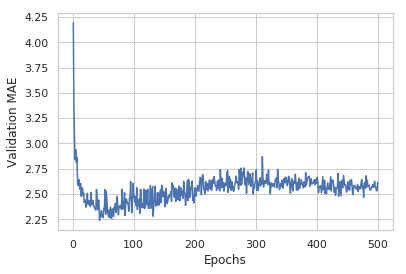

In [65]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

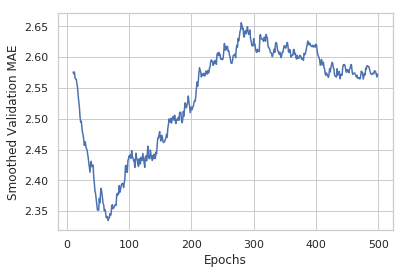

In [68]:
# It's a bit hard to see what's going on, so omit the first 10 data points
# and replace each point with an exponential moving average of the previous points
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(10, len(smooth_mae_history)+10), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Smoothed Validation MAE")
plt.show()

In [69]:
# Fit a final, best model
model = build_model()
# Train on all the data
model.fit(train_data, train_targets,
         epochs=80, batch_size=16, verbose=0)
test_mse, test_mae = model.evaluate(test_data, test_targets)

print(test_mae)

102/102 [==============================] - 0s 4ms/step
2.5627149600608674
